### Парсим данные

In [1]:
# from src.utils.parser import parse_snp500

# parse_snp500(
#     path_to_save='data/',
#     timeframe='1d',
#     start_date='2020-01-01',
#     history_len=256,
#     target_len=32,
#     split_coef=0.1,
# )

In [69]:
from src.utils.dataset import TradingDataset, TradingNormalizer

normalizer = TradingNormalizer(method='log_returns', history_len=256)

dataset = TradingDataset(
    data_path='data/',
    mode='train',
    history_len=256, 
    target_len=32,
    normalizer=normalizer,
)

Found 507130 samples for train mode


History shape: torch.Size([1, 256, 5])
Target shape: torch.Size([1, 32, 1])
Ticker: ZBH
Stats: {'first_log_price_0': np.float32(4.772718), 'log_return_mean_0': np.float32(0.00018729977), 'log_return_std_0': np.float32(0.019473525), 'first_log_price_1': np.float32(4.7839556), 'log_return_mean_1': np.float32(0.00019978915), 'log_return_std_1': np.float32(0.01599193), 'first_log_price_2': np.float32(4.7666507), 'log_return_mean_2': np.float32(0.00019495908), 'log_return_std_2': np.float32(0.017985312), 'first_log_price_3': np.float32(4.7833257), 'log_return_mean_3': np.float32(0.00018175911), 'log_return_std_3': np.float32(0.01905507), 'volume_mean': np.float32(1.4325096e+06), 'volume_std': np.float32(733743.25)}


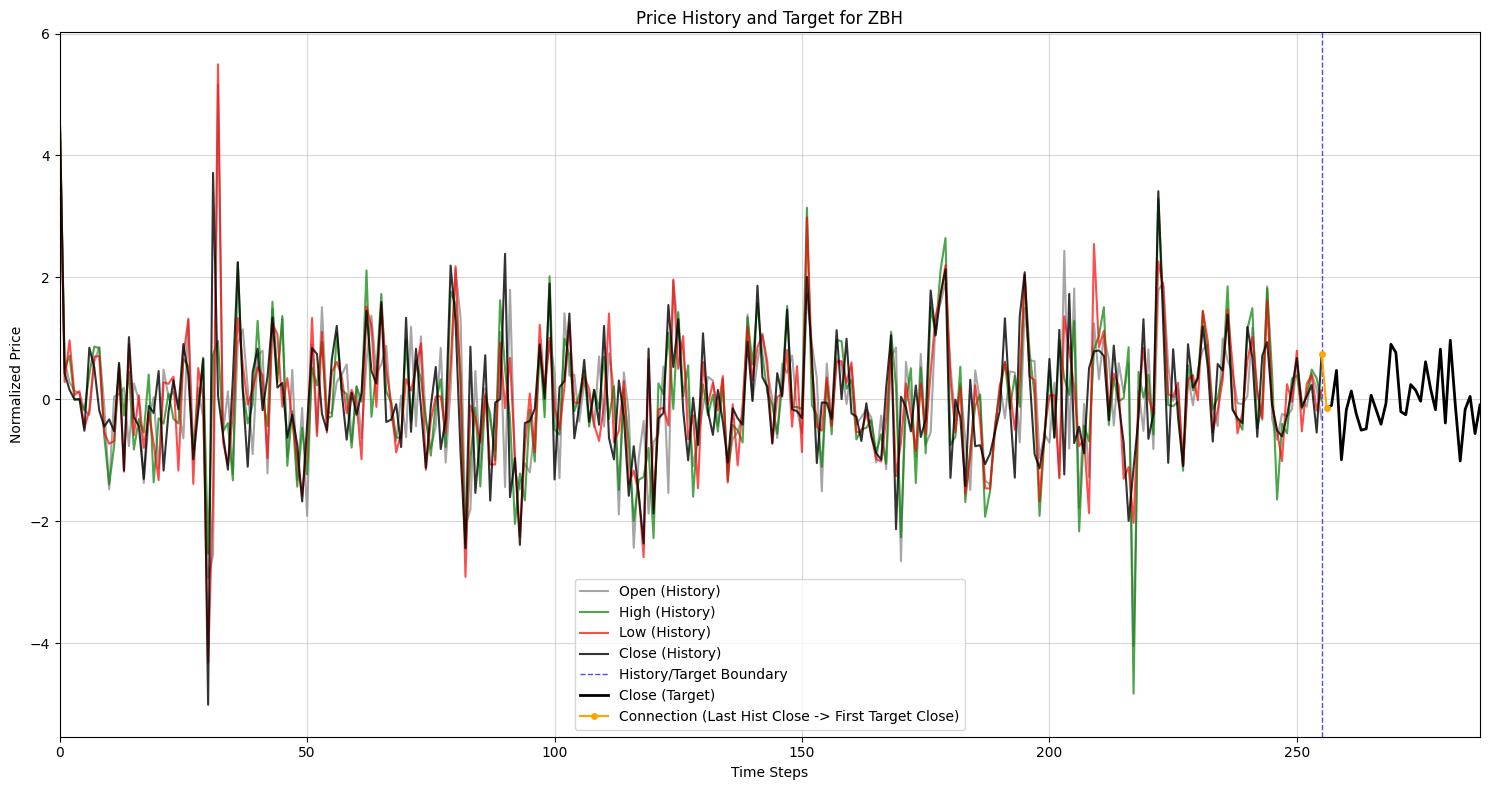

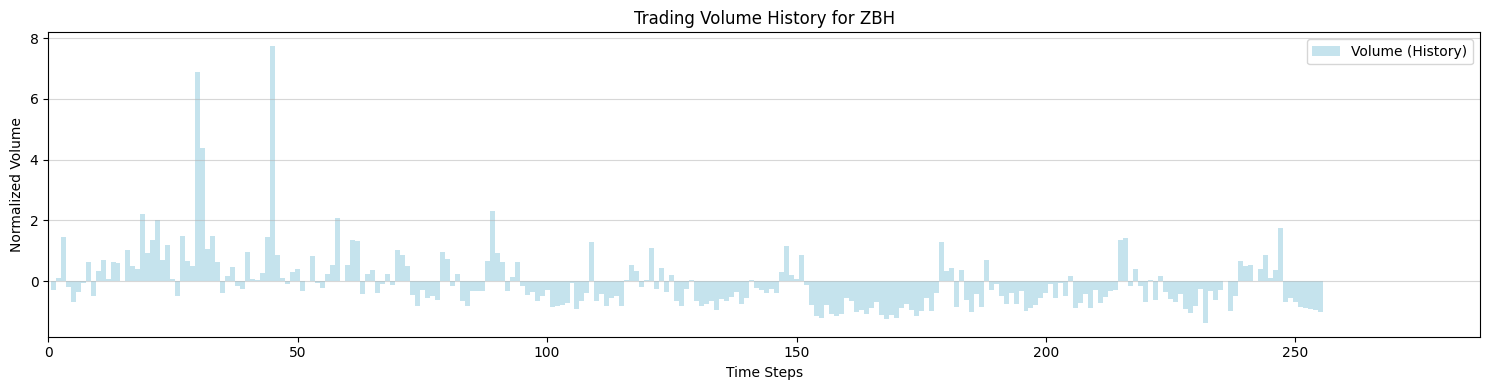

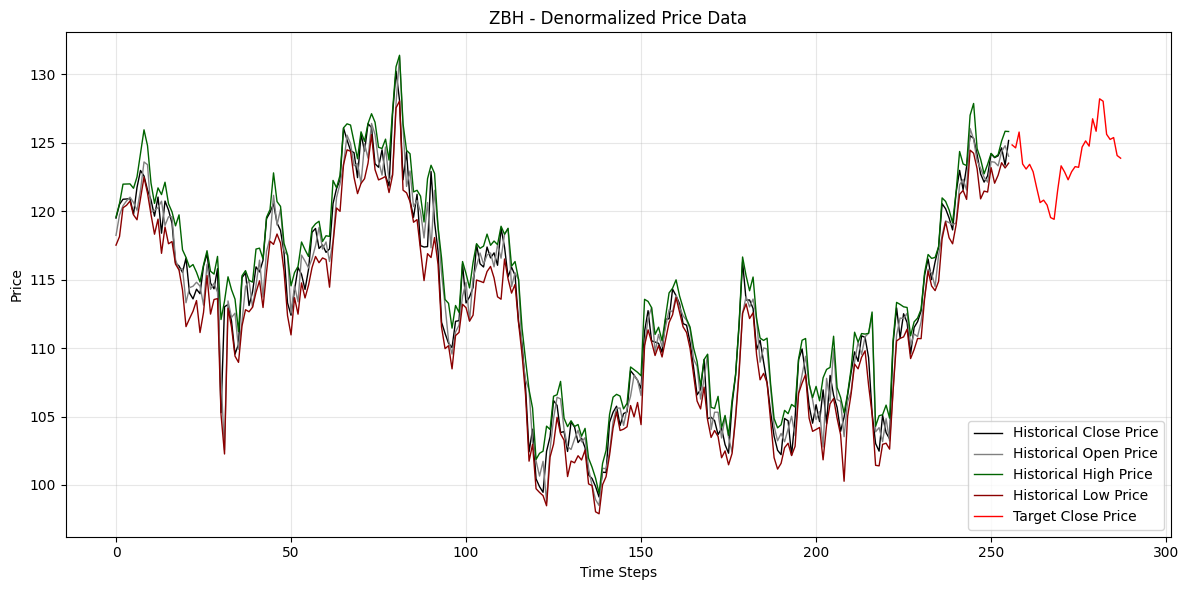

In [74]:
import torch
from src.utils.visualization import plot_dataset_sample, plot_denormalized_sample
from diffusers import DDPMScheduler


idx = torch.randint(0, len(dataset), (1,)).item()
sample = dataset[idx]
print(f"History shape: {sample['history'].shape}")
print(f"Target shape: {sample['target'].shape}")
print(f"Ticker: {sample['ticker']}")
print(f"Stats: {sample['stats']}")


plot_dataset_sample(sample)
plot_denormalized_sample(sample)

### Проверка Scheduler

751


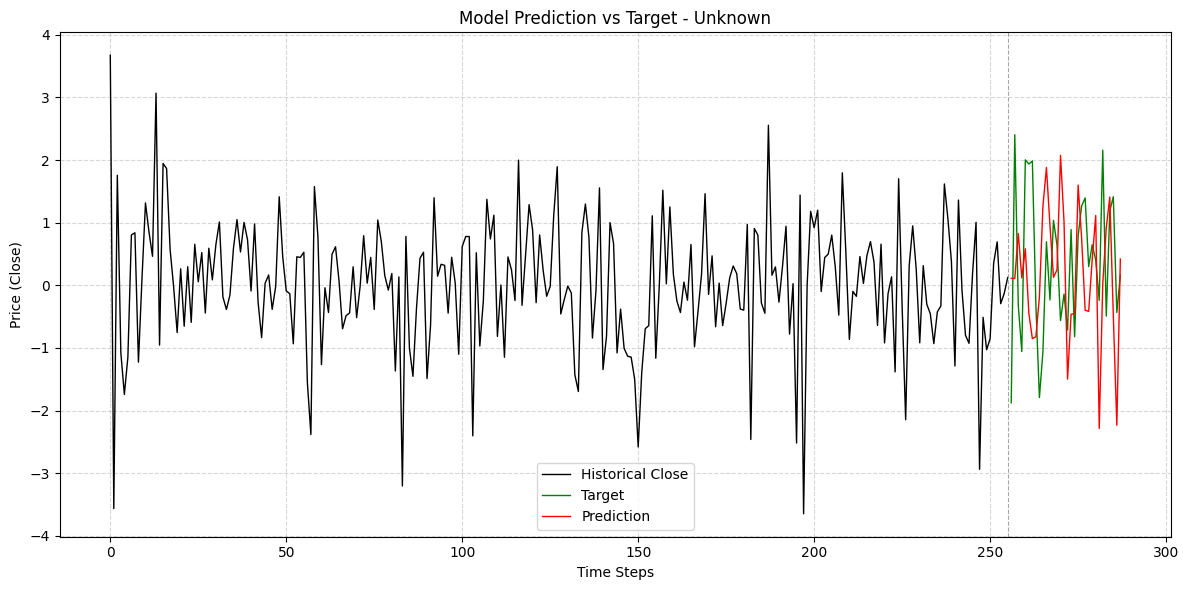

In [68]:
from diffusers import DDPMScheduler
from src.utils.visualization import plot_model_prediction

scheduler = DDPMScheduler()
timestep = torch.randint(0, 1000, (1,))
noisy = scheduler.add_noise(sample['target'], torch.randn_like(sample['target']), timestep)

print(timestep.item())
plot_model_prediction(sample['history'], sample['target'], noisy)
# plot_model_prediction(sample['history'], noisy, noisy)